# Import all essential Libraries

In [1]:
#Importing the libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Load the dataset

In [2]:
df=pd.read_csv('E_Commerce.csv')
df

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,A,Ship,4,1,252,5,medium,F,1,1538,1
10995,10996,B,Ship,4,1,232,5,medium,F,6,1247,0
10996,10997,C,Ship,5,4,242,5,low,F,4,1155,0
10997,10998,F,Ship,5,2,223,6,medium,M,2,1210,0


In [79]:
#check shape of the data
df.shape

(10999, 12)

The dataset used for model building contained 10999 observations of 12 variables.

# Data Pre-processing 

In [3]:
#drop the ID column its not useful for us for data analysis
df=df.drop(columns='ID',axis=1)

In [81]:
#check the data types and null/missing values in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Warehouse_block      10999 non-null  object
 1   Mode_of_Shipment     10999 non-null  object
 2   Customer_care_calls  10999 non-null  int64 
 3   Customer_rating      10999 non-null  int64 
 4   Cost_of_the_Product  10999 non-null  int64 
 5   Prior_purchases      10999 non-null  int64 
 6   Product_importance   10999 non-null  object
 7   Gender               10999 non-null  object
 8   Discount_offered     10999 non-null  int64 
 9   Weight_in_gms        10999 non-null  int64 
 10  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 945.4+ KB


In [82]:
#check the null values
df.isnull().sum()

Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64

In [83]:
#check the duplicates
df.duplicated().sum()

0

In [84]:
#statastical analysis o the data
df.describe()

,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [85]:
#seprate the all catagorical column and check valuecounts of each column for each catogory
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Product_importance', 'Gender'], dtype='object')

In [86]:
#value counts for each catogories column
for column in object_columns:
    print(df[column].value_counts())

Warehouse_block
F    3666
D    1834
A    1833
B    1833
C    1833
Name: count, dtype: int64
Mode_of_Shipment
Ship      7462
Flight    1777
Road      1760
Name: count, dtype: int64
Product_importance
low       5297
medium    4754
high       948
Name: count, dtype: int64
Gender
F    5545
M    5454
Name: count, dtype: int64


# Exploratory data analysis

During the exploratory data analysis, I will examine how the target variable interacts with other variables and analyze the distribution of these variables within the dataset to gain a deeper understanding of the data.

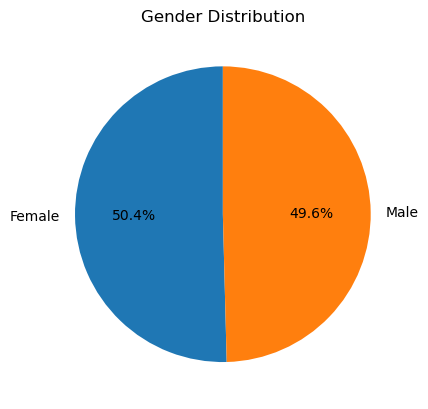

In [87]:
#Customer Gender Prediction
plt.pie(df['Gender'].value_counts(),labels=['Female','Male'],autopct='%1.1f%%',startangle=90)
plt.title('Gender Distribution')
plt.show()
#The dataset has the equal number of both males and female customers, with percentage of 49.6% and 50.4% respectively

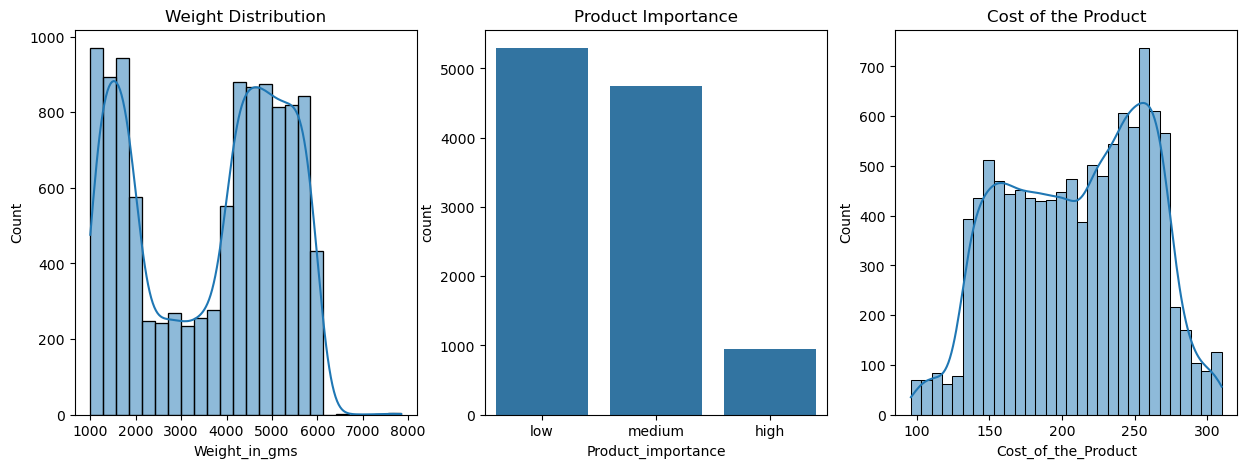

In [88]:
#Product Properties
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['Weight_in_gms'], ax=ax[0], kde=True).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1]).set_title('Product Importance')
sns.histplot(df['Cost_of_the_Product'], ax=ax[2], kde=True).set_title('Cost of the Product')
plt.show()

The first graph shows that products primarily weigh between 1000-2000 grams and 4000-6000 grams, indicating that these weight categories are more prevalent in the company's sales. 
In the second graph, which represents product importance, we observe that most products are categorized as having low or medium importance. 
The third graph focuses on the cost distribution, highlighting a higher frequency of products priced between 150-200 and 225-275 dollars.

Based on these observations, it's apparent that the company predominantly sells products weighing less than 6000 grams, with low to medium importance, and priced between 150-275 dollars.

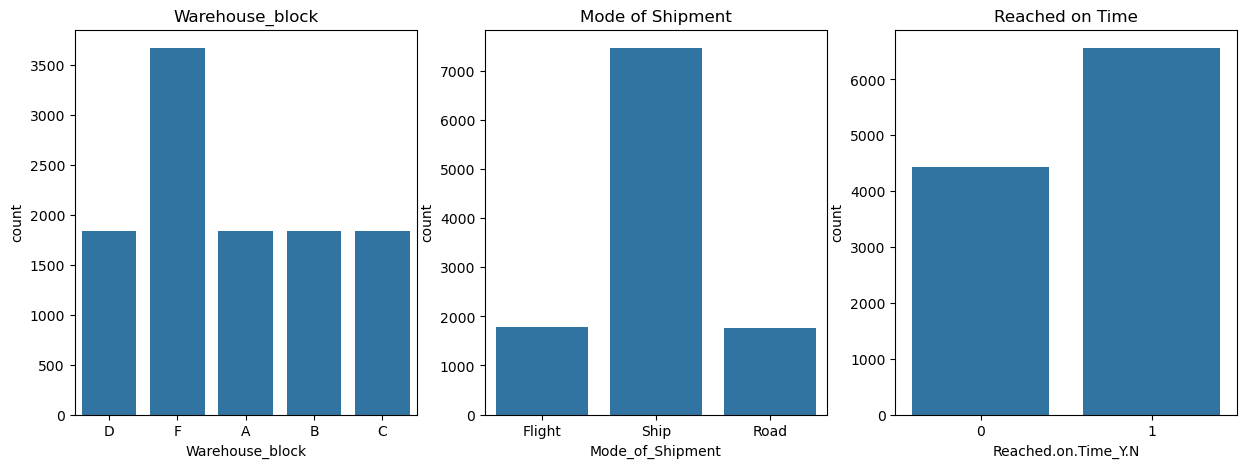

In [89]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0]).set_title('Warehouse_block')
sns.countplot(x='Mode_of_Shipment',data=df,ax=ax[1]).set_title('Mode of Shipment')
sns.countplot(x='Reached.on.Time_Y.N', data = df, ax=ax[2]).set_title('Reached on Time')
plt.show()

The first graph indicates that warehouse F handles the most products, around 3500, while the other warehouses manage a comparable and lower number
of products. 
The second graph displays the shipping methods, revealing that the majority of products are transported by ship, with about 
2000 products shipped via flight and road.
The third graph illustrates delivery timeliness, showing a higher quantity of products delivered 
on time compared to those that are late.
Considering these observations, it can be inferred that warehouse F might be strategically located near a seaport, as it not only 
has the highest volume of products but also predominantly uses shipping as the mode of transport.

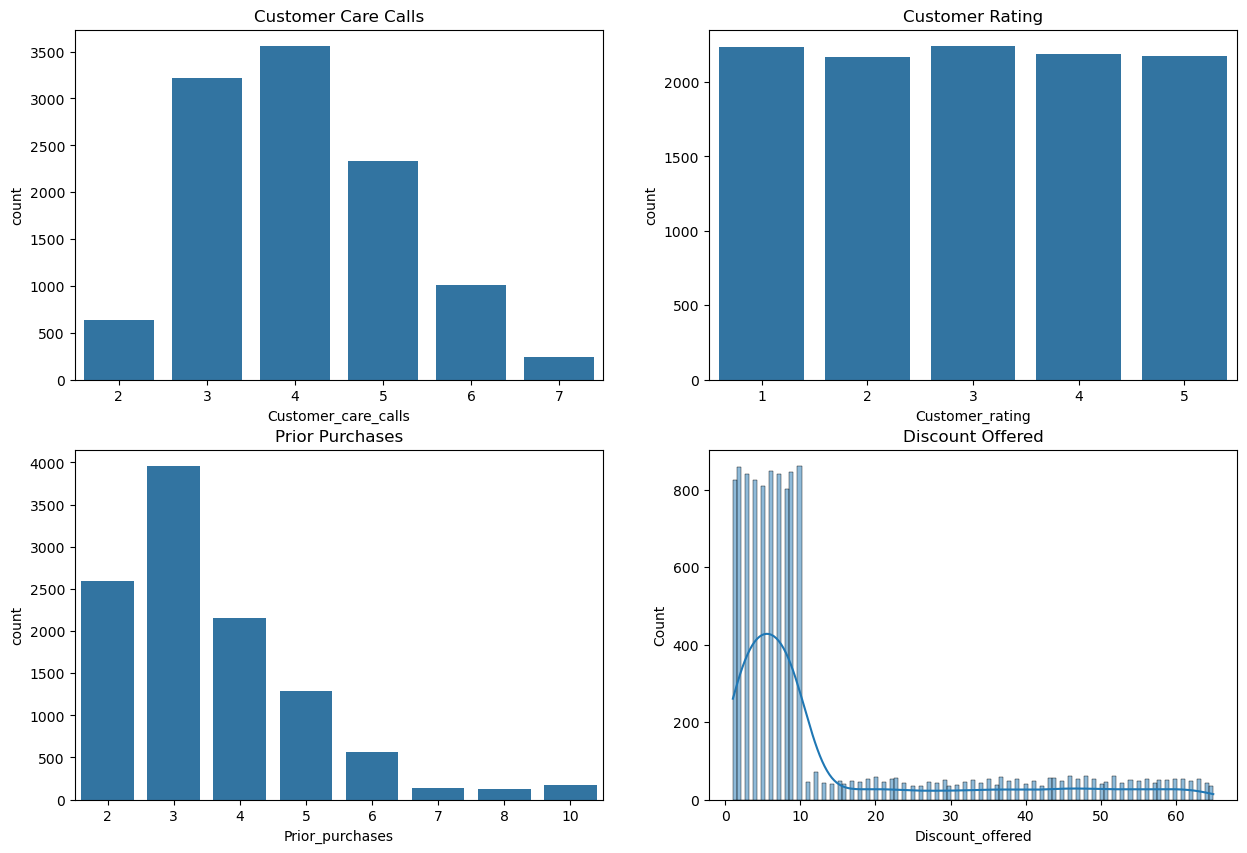

In [90]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0]).set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1]).set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0]).set_title('Prior Purchases')
sns.histplot(x = 'Discount_offered', data = df, ax=ax[1,1], kde = True).set_title('Discount Offered')
plt.show()

->The graphs provide an overview of customer experience metrics, including customer service interactions, ratings, previous purchases, and discounts. The first graph indicates that most customers make 3-4 customer care calls, suggesting possible issues with product delivery. 
->The second graph shows an even distribution of customer ratings, with a slight increase in 1-star ratings, hinting at some level of dissatisfaction with the service.
->The third graph reveals that a majority of customers have made 2-3 prior purchases, indicating that repeat customers are generally satisfied with the service and continue to engage with the company. 
->The fourth graph displays the distribution of discounts, with most products receiving a 0-10% discount, suggesting that the company offers limited discounts on its products.

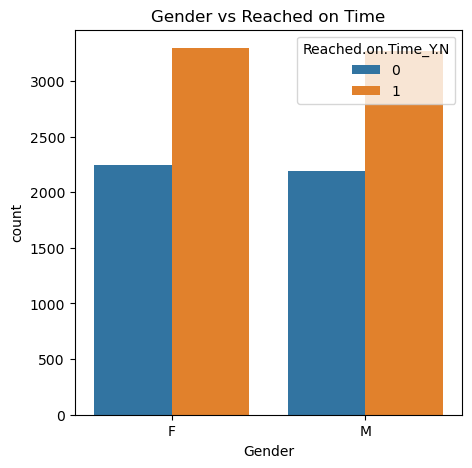

In [91]:
plt.figure(figsize=(5,5))
sns.countplot(x = 'Gender', data = df,hue = 'Reached.on.Time_Y.N').set_title('Gender vs Reached on Time')
plt.show()

The data shows that the timely delivery of products is consistent across both genders, indicating that customer gender does not influence the punctuality of product delivery.

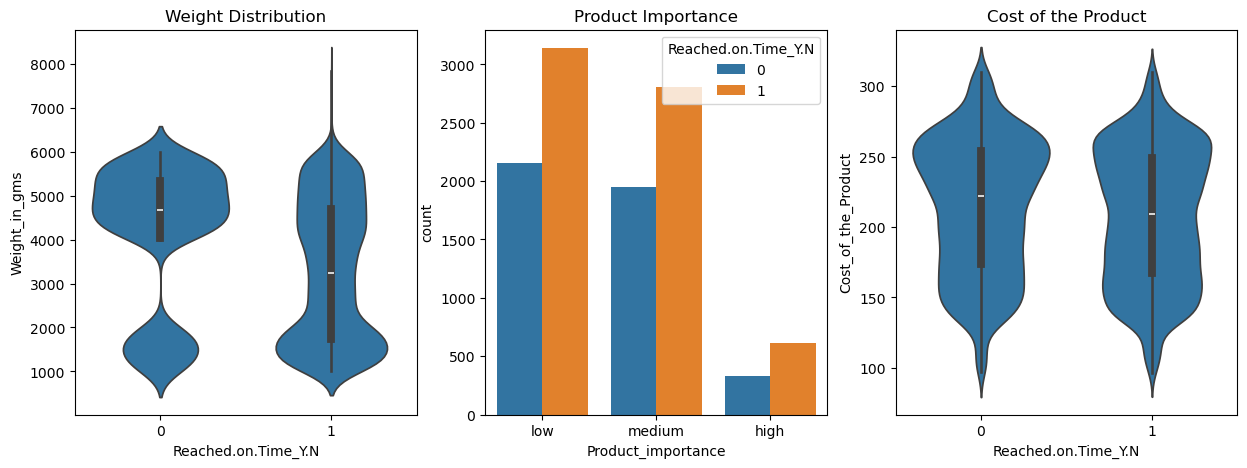

In [92]:
fig, ax = plt.subplots(1,3,figsize=(15,5))
sns.violinplot(y = df['Weight_in_gms'],x = df['Reached.on.Time_Y.N'], ax=ax[0]).set_title('Weight Distribution')
sns.countplot(x = 'Product_importance', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Product Importance')
sns.violinplot(y = df['Cost_of_the_Product'], ax=ax[2],x = df['Reached.on.Time_Y.N']).set_title('Cost of the Product')
plt.show()

The plots illustrate how product characteristics affect delivery timeliness. The first graph reveals that product weight influences delivery punctuality; specifically, products weighing over 4500 grams tend to be delivered late, whereas those in the 2500-3500 gram range are more often delivered on time. The second graph, focusing on product importance, indicates that this factor does not significantly affect delivery timeliness. The third graph shows a correlation between product cost and delivery, with products priced above $250 experiencing more frequent delivery delays.

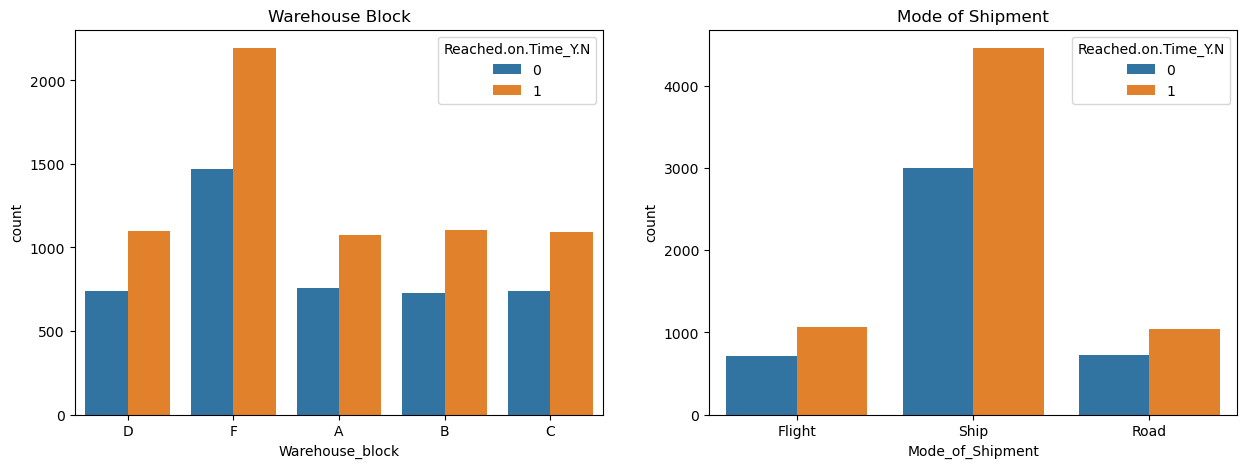

In [93]:
fig, ax = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x = 'Warehouse_block', data = df, ax=ax[0], hue = 'Reached.on.Time_Y.N').set_title('Warehouse Block')
sns.countplot(x = 'Mode_of_Shipment', data = df, ax=ax[1], hue = 'Reached.on.Time_Y.N').set_title('Mode of Shipment')
plt.show()

The graphs demonstrate the connection between logistics operations and the timely delivery of products. Given that the majority of products are dispatched from warehouse F, which is presumed to be near a seaport due to its high shipping volume, it's notable that the mode of shipment is predominantly by ship.
However, the data shows a consistent difference in the number of products delivered on time versus late across all warehouses and shipping methods. This consistency suggests that the logistics, including the warehouse location and shipping method, do not significantly affect the timeliness of product delivery.

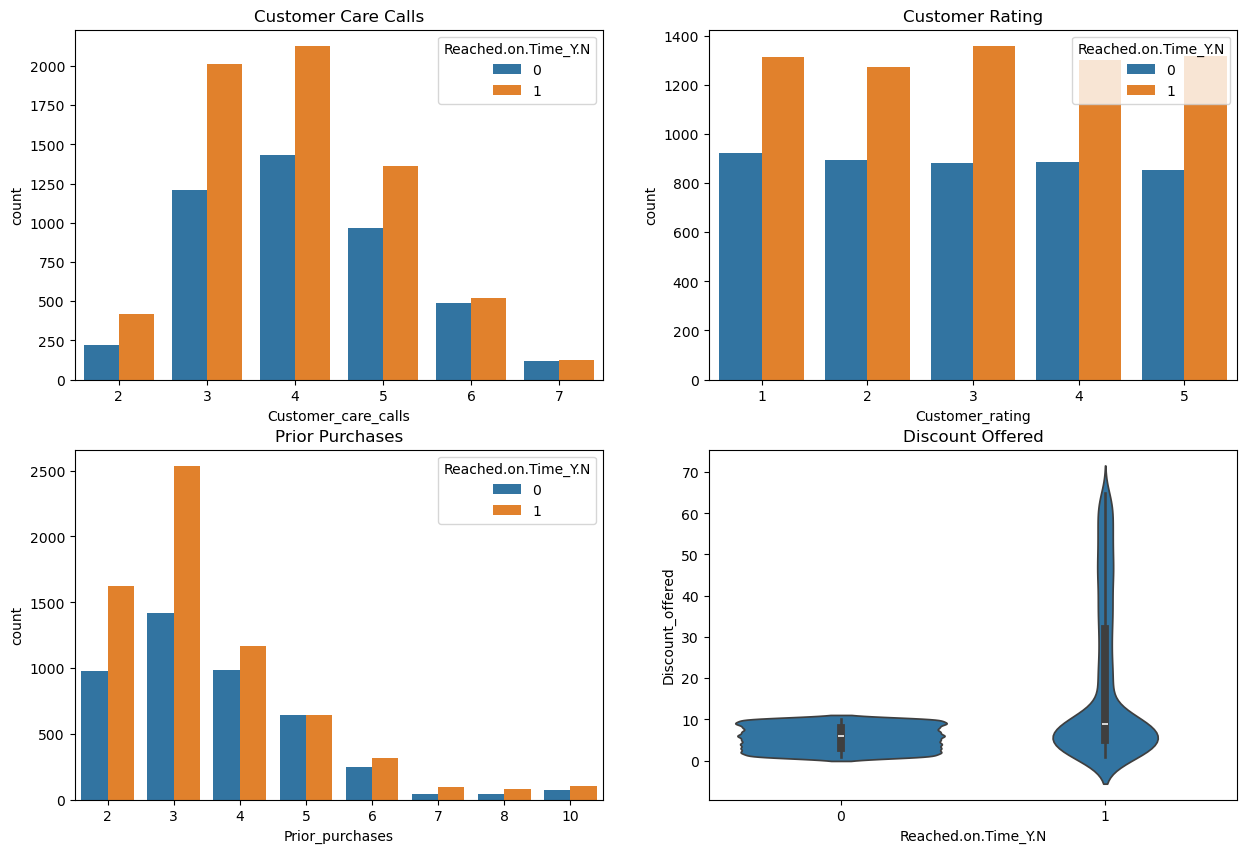

In [94]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.countplot(x = 'Customer_care_calls', data = df, ax=ax[0,0],hue = 'Reached.on.Time_Y.N').set_title('Customer Care Calls')
sns.countplot(x = 'Customer_rating', data = df, ax=ax[0,1],hue = 'Reached.on.Time_Y.N').set_title('Customer Rating')
sns.countplot(x = 'Prior_purchases', data = df, ax=ax[1,0],hue = 'Reached.on.Time_Y.N').set_title('Prior Purchases')
sns.violinplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered' ,data = df, ax=ax[1,1]).set_title('Discount Offered')
plt.show()

The graphs link customer experience with product delivery for an E-Commerce company. The first graph shows that as customer care calls increase, on-time deliveries decrease, suggesting customers call more when deliveries are late. The second graph indicates that customers with higher ratings often receive their products on time. The third graph reveals that customers who make repeat purchases tend to receive their products on time, likely encouraging their continued business. Lastly, the fourth graph shows that products with less than 10% discount are often delivered late, while those with more than 10% discount are delivered on time more frequently.

In [95]:
num_col=df.select_dtypes(include=['int'])

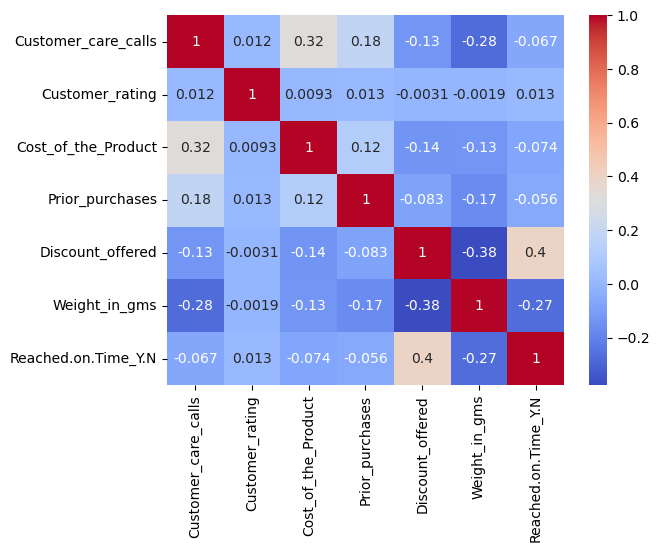

In [145]:
sns.heatmap(num_col.corr(),annot=True,cmap='coolwarm')
plt.savefig('heatmap_output.png', dpi=200, bbox_inches='tight')
plt.show()

The correlation matrix heatmap shows a positive correlation between the product's cost and the number of customer care calls.

# Split the data

In [97]:
X=df.drop('Reached.on.Time_Y.N',axis=1)
y=df['Reached.on.Time_Y.N']

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [100]:
X_train.shape,X_test.shape

((8799, 10), (2200, 10))

# Transform the data

In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [102]:
Transformer=ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(drop='first'),['Warehouse_block','Mode_of_Shipment','Gender']),
    ('tnf2',OrdinalEncoder(categories=[['low','medium','high']]),['Product_importance']),
],remainder='passthrough')

In [103]:
#column transformation for X_train #use only fit and transform methods
transformed_array = Transformer.fit_transform(X_train)
transformed_array = transformed_array.astype(int)

# Get feature names for one-hot encoded and ordinal columns
ohe_features = Transformer.named_transformers_['tnf1'].get_feature_names_out(['Warehouse_block', 'Mode_of_Shipment', 'Gender'])
ordinal_features = ['Product_importance']  # Name for the ordinal-encoded column
passthrough_features = [col for col in X_train.columns if col not in ['Warehouse_block', 'Mode_of_Shipment', 'Gender', 'Product_importance']]

# Combine all feature names
final_column_names = list(ohe_features) + ordinal_features + passthrough_features

# Convert to DataFrame
X_train_transformed = pd.DataFrame(transformed_array, columns=final_column_names)

# Display the transformed DataFrame
X_train_transformed

,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_M,Product_importance,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,0,1,0,0,0,1,0,1,6,1,104,4,23,1442
1,1,0,0,0,0,0,0,1,6,1,293,5,7,1052
2,0,0,1,0,0,1,0,1,3,4,257,4,8,4780
3,0,0,0,1,0,1,0,2,3,4,213,3,4,5996
4,0,0,0,1,1,0,0,1,3,2,235,2,9,5116
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8794,0,0,0,1,0,1,1,0,5,3,231,2,8,5743
8795,0,0,1,0,1,0,1,0,4,5,216,2,2,4905
8796,0,0,0,1,1,0,1,1,4,1,161,3,3,4590
8797,0,0,0,1,1,0,1,1,4,3,245,6,2,1727


In [104]:
#column transformation for X_test #use only transform method
transformed_array = Transformer.transform(X_test)
transformed_array = transformed_array.astype(int)

# Get feature names for one-hot encoded and ordinal columns
ohe_features = Transformer.named_transformers_['tnf1'].get_feature_names_out(['Warehouse_block', 'Mode_of_Shipment', 'Gender'])
ordinal_features = ['Product_importance']  # Name for the ordinal-encoded column
passthrough_features = [col for col in X_train.columns if col not in ['Warehouse_block', 'Mode_of_Shipment', 'Gender', 'Product_importance']]

# Combine all feature names
final_column_names = list(ohe_features) + ordinal_features + passthrough_features

# Convert to DataFrame
X_test_transformed = pd.DataFrame(transformed_array, columns=final_column_names)

# Display the transformed DataFrame
X_test_transformed

,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Gender_M,Product_importance,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms
0,0,0,0,0,0,0,1,1,5,2,240,2,4,4447
1,0,0,0,1,0,0,0,0,6,4,247,4,2,1326
2,0,0,0,1,0,1,1,1,2,1,264,3,10,3409
3,0,0,0,0,0,1,0,1,5,1,201,3,65,2488
4,0,1,0,0,0,0,1,2,2,2,242,3,9,4717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,0,0,0,0,1,0,0,0,3,3,245,2,4,4719
2196,0,0,0,0,0,1,1,2,3,5,267,2,2,5062
2197,0,0,0,0,0,0,1,0,3,5,265,10,6,4380
2198,1,0,0,0,0,0,1,1,6,1,134,3,10,1278


# Model Building
Using the following models to predict the product delivery:
Random Forest Classifier,
Decision Tree Classifier,
Logistic Regression,
K Nearest Neighbors,


# Random Forest

In [105]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [106]:
#Using GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Parameter grid
param_grid = {
    'max_depth': [4,8,12,16],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]
}

In [107]:
#GridSearchCV object
grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [108]:
#Fitting the model
grid.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12, 16],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=2)

In [109]:
print('Best parameters: ', grid.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 6, 'random_state': 42}


In [110]:
#Random Forest Classifier Object
rfc = RandomForestClassifier(criterion='gini', max_depth=8, min_samples_leaf=2, min_samples_split=6, random_state=42)

In [111]:
#Fitting the model
rfc.fit(X_train_transformed, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=2, min_samples_split=6,
                       random_state=42)

In [112]:
#Training accuracy
print('Training accuracy: ', rfc.score(X_train_transformed, y_train))

Training accuracy:  0.7437208773724286


In [113]:
#predicting the test set results
rfc_pred = rfc.predict(X_test_transformed)
rfc_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [114]:
from sklearn.metrics import accuracy_score
#Test accuracy
test_accuracy_rfc=print(accuracy_score(y_test, rfc_pred))

0.6831818181818182


# Decision tree

In [115]:
#Decision Tree Classifier Object
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [116]:
#Using GridSearchCV for hyperparameter tuning
#Parameter grid
dt_param_grid = {
    'max_depth': [2,4,6,8],
    'min_samples_leaf': [2,4,6,8],
    'min_samples_split': [2,4,6,8],
    'criterion': ['gini', 'entropy'],
    'random_state': [0,42]}

In [117]:
#GridSearchCV object for decision tree
dt_grid = GridSearchCV(estimator=dtc, param_grid=dt_param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

In [118]:
#Fitting the model
dt_grid.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8],
                         'min_samples_leaf': [2, 4, 6, 8],
                         'min_samples_split': [2, 4, 6, 8],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=2)

In [119]:
#Best parameters
print('Best parameters: ', dt_grid.best_params_)

Best parameters:  {'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 2, 'random_state': 0}


In [120]:
#Decision Tree Classifier Object
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=8, min_samples_split=2, random_state=0, class_weight='balanced')

In [121]:
#Fitting the model
dtc.fit(X_train_transformed, y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=6, min_samples_leaf=8, random_state=0)

In [122]:
#Training accuracy
print('Training accuracy: ', dtc.score(X_train_transformed, y_train))

Training accuracy:  0.6913285600636436


In [123]:
#predicting the test set results
dtc_pred = dtc.predict(X_test_transformed)
dtc_pred

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [124]:
#Test accuracy
test_accuracy_dtc=print(accuracy_score(y_test, dtc_pred))

0.6836363636363636


# Logistic regression

In [125]:
#Logistic Regression Object
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [126]:
lr.fit(X_train_transformed, y_train)

LogisticRegression()

In [127]:
#Training accuracy
lr.score(X_train_transformed, y_train)

0.6360950107966814

In [128]:
#predicting the test set results
lr_pred = lr.predict(X_test_transformed)
lr_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [129]:
#Test accuracy
test_accuracy_lr=print(accuracy_score(y_test, lr_pred))

0.6277272727272727


# K-Nearest Nabours

In [130]:
from sklearn.neighbors import KNeighborsClassifier
#KNN Classifier Object
knn = KNeighborsClassifier()

In [131]:
#fitting the model
knn.fit(X_train_transformed, y_train)

KNeighborsClassifier()

In [132]:
#Training accuracy
knn.score(X_train_transformed, y_train)

0.7792931014888056

In [133]:
#predicting the test set results
knn_pred = lr.predict(X_test_transformed)
knn_pred

array([0, 0, 1, ..., 0, 1, 1], dtype=int64)

In [134]:
#Test accuracy
test_accuracy_knn=print(accuracy_score(y_test, knn_pred))

0.6277272727272727


# Model Evaluation

In [135]:
from sklearn.metrics import confusion_matrix, classification_report, mean_absolute_error, r2_score, mean_squared_error

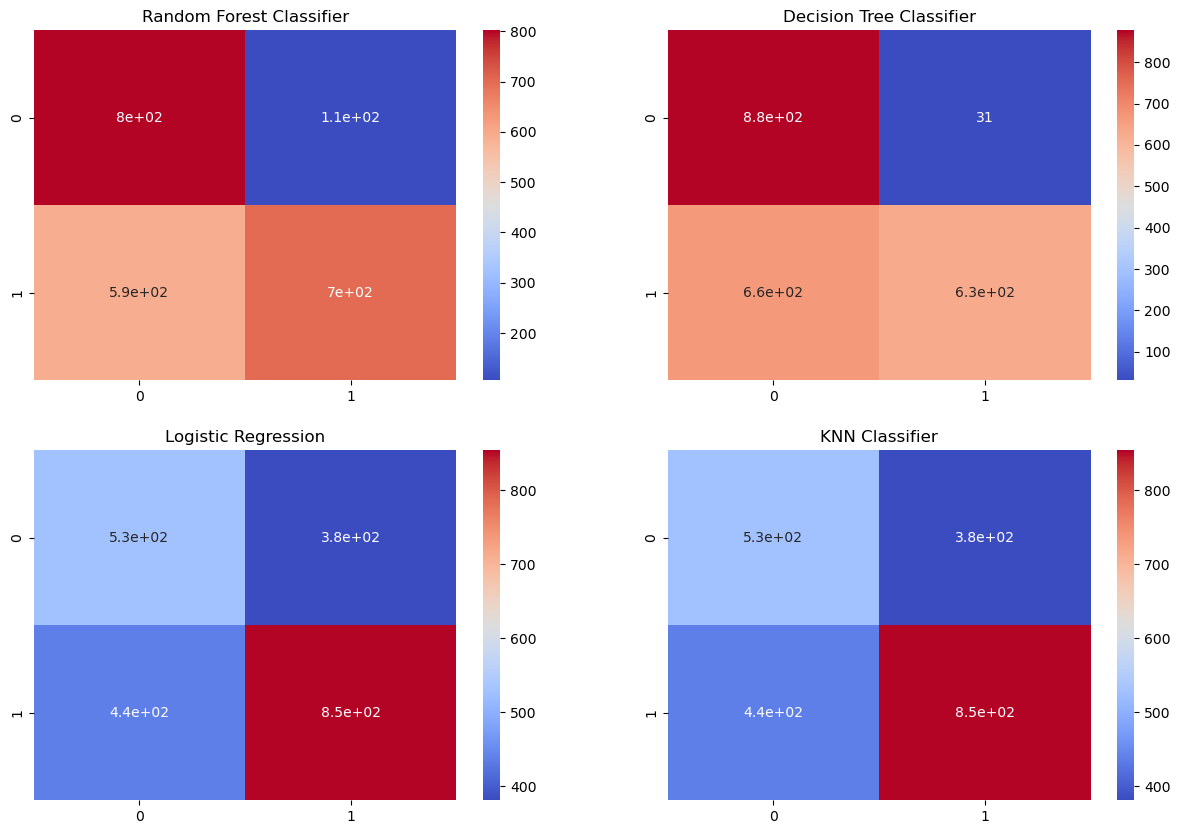

In [146]:
fig, ax = plt.subplots(2,2,figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, cmap='coolwarm', ax=ax[0,0]).set_title('Random Forest Classifier')
sns.heatmap(confusion_matrix(y_test, dtc_pred), annot=True, cmap='coolwarm', ax=ax[0,1]).set_title('Decision Tree Classifier')
sns.heatmap(confusion_matrix(y_test, lr_pred), annot=True, cmap='coolwarm', ax=ax[1,0]).set_title('Logistic Regression')
sns.heatmap(confusion_matrix(y_test, knn_pred), annot=True, cmap='coolwarm', ax=ax[1,1]).set_title('KNN Classifier')
plt.savefig('Confusion maatrix_output.png', dpi=200, bbox_inches='tight')
plt.show()

In [137]:
#classification report
print('Random Forest Classifier: \n', classification_report(y_test, rfc_pred))
print('Decision Tree Classifier: \n', classification_report(y_test, dtc_pred))
print('Logistic Regression: \n', classification_report(y_test, lr_pred))
print('KNN Classifier: \n', classification_report(y_test, knn_pred))

Random Forest Classifier: 
               precision    recall  f1-score   support

           0       0.58      0.88      0.70       908
           1       0.87      0.54      0.67      1292

    accuracy                           0.68      2200
   macro avg       0.72      0.71      0.68      2200
weighted avg       0.75      0.68      0.68      2200

Decision Tree Classifier: 
               precision    recall  f1-score   support

           0       0.57      0.97      0.72       908
           1       0.95      0.49      0.64      1292

    accuracy                           0.68      2200
   macro avg       0.76      0.73      0.68      2200
weighted avg       0.79      0.68      0.67      2200

Logistic Regression: 
               precision    recall  f1-score   support

           0       0.55      0.58      0.56       908
           1       0.69      0.66      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.62      0.62      

Text(0, 0.5, 'Accuracy')

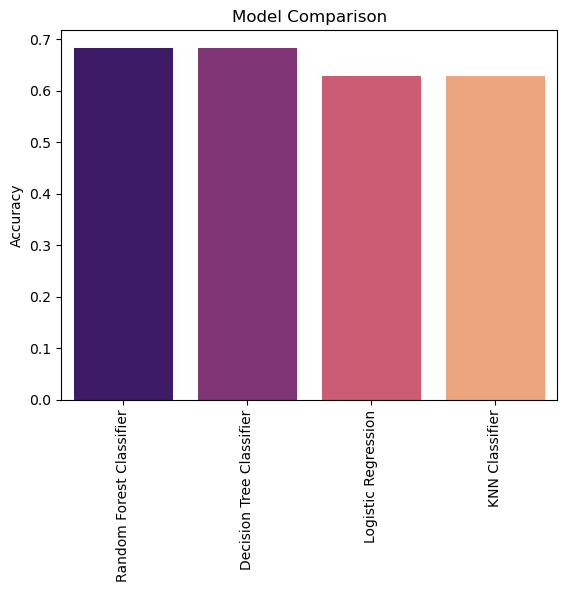

In [138]:
models = ['Random Forest Classifier', 'Decision Tree Classifier', 'Logistic Regression', 'KNN Classifier']
accuracy = [accuracy_score(y_test, rfc_pred), accuracy_score(y_test, dtc_pred), accuracy_score(y_test, lr_pred), accuracy_score(y_test, knn_pred)]
sns.barplot(x=models, y=accuracy, palette='magma').set_title('Model Comparison')
plt.xticks(rotation=90)
plt.ylabel('Accuracy')

# Model saving

In [143]:
import joblib
joblib.dump(rfc, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'")

#Load the model back
loaded_model = joblib.load('random_forest_model.pkl')
print("Model loaded successfully.")

Model saved as 'random_forest_model.pkl'
Model loaded successfully.


# Conclusion
The project's objective was to forecast on-time delivery for an e-commerce company's products and to explore factors influencing delivery times and customer behavior. The exploratory analysis highlighted that product weight and cost are crucial to delivery success, with products in the 2500-3500 gram range and priced under $250 being more likely to arrive on time. A significant volume of products was dispatched from warehouse F using shipping, suggesting its proximity to a seaport.
Customer behavior also sheds light on delivery outcomes. An increase in customer care calls often correlates with delivery delays. In contrast, customers with a history of multiple purchases tend to experience more punctual deliveries, which might explain their repeat business. As for discounts, products with minimal discounts (0-10%) saw more late deliveries, while those with discounts exceeding 10% were more often delivered on time.
Regarding machine learning models, the decision tree classifier outperformed others with a 68.36% accuracy rate. Close behind were the random forest classifier with 68.13%. The K Nearest Neighbors model and logistic regression trailed with the least accuracy at 62.77%.
